In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load stock data

AstraZeneca = yf.download('AZN.L', start='2014-01-01', end='2023-01-01')
Shell = yf.download('SHEL.L', start='2014-01-01', end='2023-01-01')
HSBC = yf.download('HSBA.L', start='2014-01-01', end='2023-01-01')
Unilever = yf.download('ULVR.L', start='2014-01-01', end='2023-01-01')
BritishTobacco = yf.download('BATS.L', start='2014-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Function to format data

def format(df):
  df.reset_index(inplace=True)
  df['Date'] = pd.to_datetime(df['Date'])
  df = df.set_index('Date')
  df['Return'] = df['Adj Close'].pct_change()
  df.dropna(inplace=True)
  df = df[['Adj Close']]
  return df

In [5]:
AstraZeneca = format(AstraZeneca)
Shell = format(Shell)
HSBC = format(HSBC)
Unilever = format(Unilever)
BritishTobacco = format(BritishTobacco)

In [ ]:
BritishTobacco.head()

,Adj Close
Date,
2014-01-03,1676.757202
2014-01-06,1679.639038
2014-01-07,1669.159668
2014-01-08,1652.915527
2014-01-09,1630.384277


In [6]:
# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(AstraZeneca, Shell, on='Date', suffixes=('_AstraZeneca', '_Shell'))
merged_df = pd.merge(merged_df, HSBC, on='Date')
merged_df = pd.merge(merged_df, Unilever, on='Date', suffixes=('_HSBC', '_Unilever'))
merged_df = pd.merge(merged_df, BritishTobacco, on='Date')
merged_df.reset_index(inplace=True)
merged_df.columns = ['Date', 'Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco']
merged_df.head()

,Date,Adj_Close_AstraZeneca,Adj_Close_Shell,Adj_Close_HSBC,Adj_Close_Unilever,Adj_Close_BritishTobacco
0,2014-01-03,2475.004395,1211.850708,359.910583,1703.883667,1676.756836
1,2014-01-06,2483.977539,1205.394409,361.884491,1701.096191,1679.638916
2,2014-01-07,2459.127930,1212.131592,370.547852,1702.489136,1669.158691
3,2014-01-08,2450.153809,1203.429199,369.835052,1678.795166,1652.915894
4,2014-01-09,2466.030518,1204.271484,366.325867,1651.616577,1630.384521


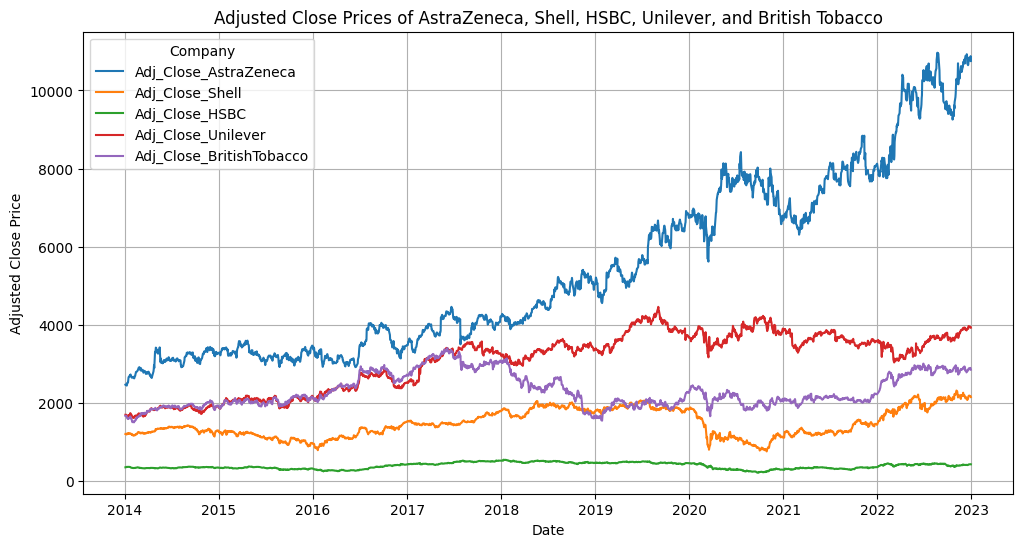

In [7]:
# Transform data to long format
long_df = pd.melt(merged_df, id_vars=['Date'], value_vars=['Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco'],
                  var_name='Company', value_name='Adj_Close')

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x='Date', y='Adj_Close', hue='Company')

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices of AstraZeneca, Shell, HSBC, Unilever, and British Tobacco')
plt.legend(title='Company')
plt.grid(True)
plt.show()

In [8]:
print(merged_df.describe())

                                Date  Adj_Close_AstraZeneca  Adj_Close_Shell  \
count                           2271            2271.000000      2271.000000   
mean   2018-06-30 10:08:05.072655104            5390.159618      1485.323293   
min              2014-01-03 00:00:00            2450.153809       765.808105   
25%              2016-04-02 12:00:00            3367.768311      1213.524902   
50%              2018-07-02 00:00:00            4588.932129      1411.684692   
75%              2020-09-26 12:00:00            7231.812012      1833.090454   
max              2022-12-30 00:00:00           10965.125000      2323.439697   
std                              NaN            2250.223272       354.169562   

       Adj_Close_HSBC  Adj_Close_Unilever  Adj_Close_BritishTobacco  
count     2271.000000         2271.000000               2271.000000  
mean       395.825235         3078.301450               2315.495416  
min        221.564621         1622.347412               1509.605469  

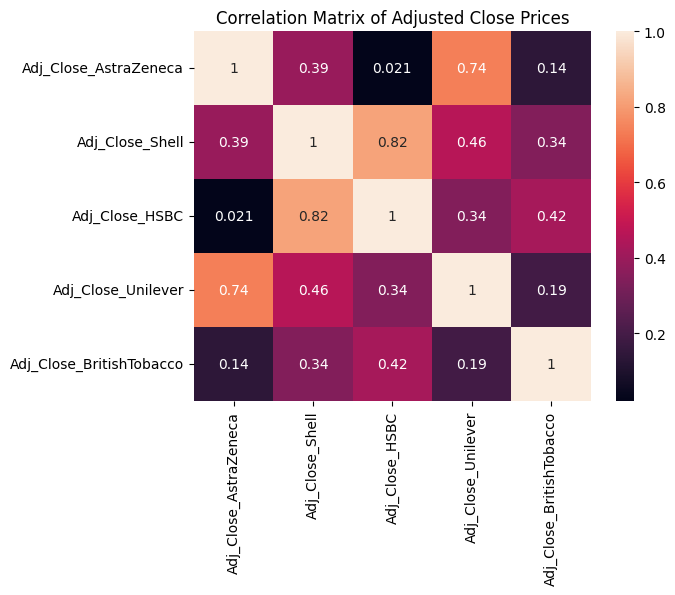

In [9]:
# Use Heatmap to view correlation matrix

adj_close_columns = ['Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco']
correlation_matrix = merged_df[adj_close_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Adjusted Close Prices')
plt.show()

In [10]:
# Load vix data
vix = pd.read_csv('/content/drive/MyDrive/VIX_2.csv')
vix['Date'] = pd.to_datetime(vix['Date'])
vix = vix.set_index('Date')
vix = vix[['Adj Close']]
vix = format(vix)
vix.head()

<ipython-input-4-0c944d099b04>:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['Adj Close'].pct_change()


,Adj Close
Date,
2014-01-03,13.76
2014-01-06,13.55
2014-01-07,12.92
2014-01-08,12.87
2014-01-09,12.89


In [11]:
# Extract the relevant column for Shell's adjusted close prices
shell_prices = merged_df[['Date', 'Adj_Close_Shell']]
shell_prices.set_index('Date', inplace=True)
shell_prices.head()

,Adj_Close_Shell
Date,
2014-01-03,1211.850708
2014-01-06,1205.394409
2014-01-07,1212.131592
2014-01-08,1203.429199
2014-01-09,1204.271484


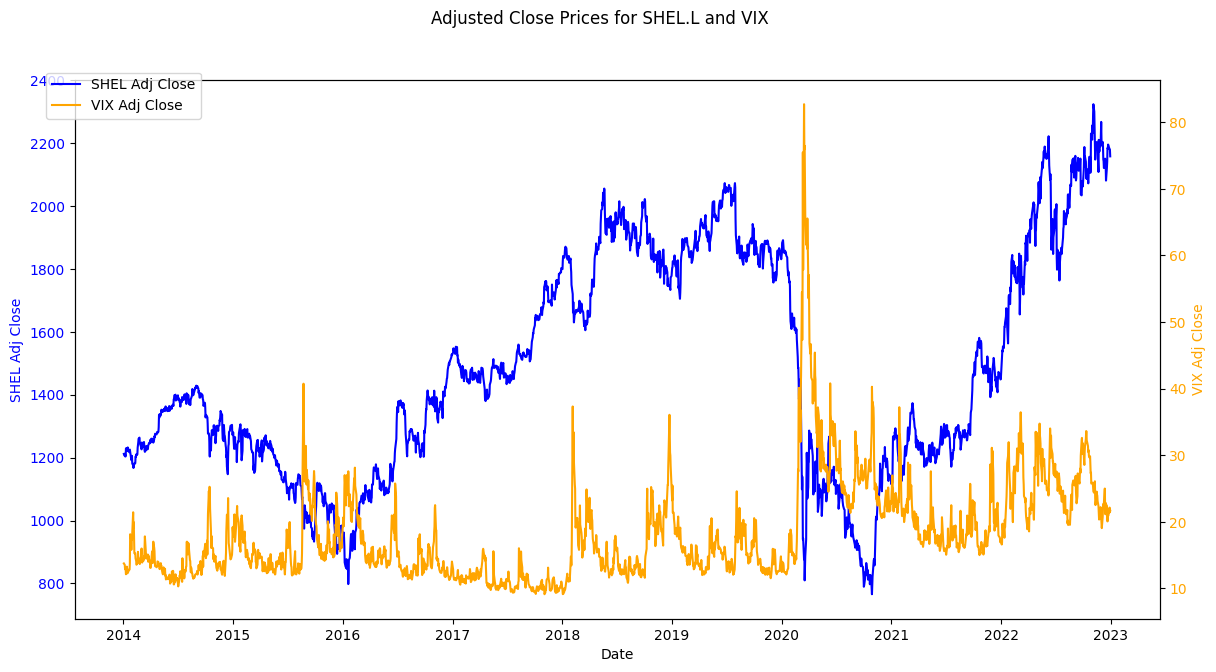

In [12]:
 # Plotting Adj Close prices for VIX and Stock Adj Close using secondary y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(shell_prices.index, shell_prices['Adj_Close_Shell'], label='SHEL Adj Close', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('SHEL Adj Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(vix.index, vix['Adj Close'], label='VIX Adj Close', color='orange')
ax2.set_ylabel('VIX Adj Close', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Adjusted Close Prices for SHEL.L and VIX')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

In [13]:
shell_vix = pd.merge(shell_prices, vix, how='inner', on='Date')

shell_vix.head()

,Adj_Close_Shell,Adj Close
Date,,
2014-01-03,1211.850708,13.76
2014-01-06,1205.394409,13.55
2014-01-07,1212.131592,12.92
2014-01-08,1203.429199,12.87
2014-01-09,1204.271484,12.89


In [14]:
# renaming shell_vix columns
shell_vix.rename(columns={
    'Adj Close': 'VIX_Adj_Close',
}, inplace=True)

shell_vix.head()

,Adj_Close_Shell,VIX_Adj_Close
Date,,
2014-01-03,1211.850708,13.76
2014-01-06,1205.394409,13.55
2014-01-07,1212.131592,12.92
2014-01-08,1203.429199,12.87
2014-01-09,1204.271484,12.89


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(shell_vix)

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]  # Predicting both 'Adj_Close_Shell' and 'VIX_Adj_Close'
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Check shapes of the created sequences
print(f'Created sequences X shape: {X.shape}, y shape: {y.shape}')

# Step 1: Split data into train set (70%) and a temp set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split the temp set into validation set (15%) and test set (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape input to be 3D [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Check the shapes after reshaping
print(f'Reshaped X_train shape: {X_train.shape}')
print(f'Reshaped X_val shape: {X_val.shape}')
print(f'Reshaped X_test shape: {X_test.shape}')

Created sequences X shape: (2162, 60, 2), y shape: (2162, 2)
Reshaped X_train shape: (1513, 60, 2)
Reshaped X_val shape: (324, 60, 2)
Reshaped X_test shape: (325, 60, 2)


In [16]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.1 MB/s eta 0:00:00


In [17]:
import keras_tuner as kt
def build_model(hp):
    model = Sequential()

    # Define the hyperparameters
    units = hp.Int('units', min_value=32, max_value=128, step=16)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)

    # Build the model using the hyperparameters
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=2))  # Output layer for 2 variables

    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=[MeanAbsoluteError(), RootMeanSquaredError()])

    return model

In [19]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per hyperparameter combination
    directory='my_dir',  # Directory to save the search results
    project_name='rnn_hyperparameter_tuning'
)

In [21]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Trial 10 Complete [00h 04m 07s]
val_loss: 0.0007715711835771799

Best val_loss So Far: 0.000757623347453773
Total elapsed time: 00h 40m 04s


In [22]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# retrain the best model
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate on the test set
test_loss, test_mae, test_rmse = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 263ms/step - loss: 0.0341 - mean_absolute_error: 0.1190 - root_mean_squared_error: 0.1723 - val_loss: 0.0017 - val_mean_absolute_error: 0.0305 - val_root_mean_squared_error: 0.0414
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - loss: 0.0034 - mean_absolute_error: 0.0401 - root_mean_squared_error: 0.0579 - val_loss: 0.0014 - val_mean_absolute_error: 0.0276 - val_root_mean_squared_error: 0.0368
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - loss: 0.0030 - mean_absolute_error: 0.0376 - root_mean_squared_error: 0.0546 - val_loss: 0.0012 - val_mean_absolute_error: 0.0263 - val_root_mean_squared_error: 0.0350
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - loss: 0.0027 - mean_absolute_error: 0.0365 - root_mean_squared_error: 0.0513 - val_loss: 0.0012 - val_mean_absolute_error: 0.0244 - val_root_mean_squared_error: 0.0341
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - loss: 0.0024 - mean_absolute_error: 0.0349 - root_mean_

In [24]:
# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

Best Hyperparameters:
units: 128
dropout_rate: 0.2


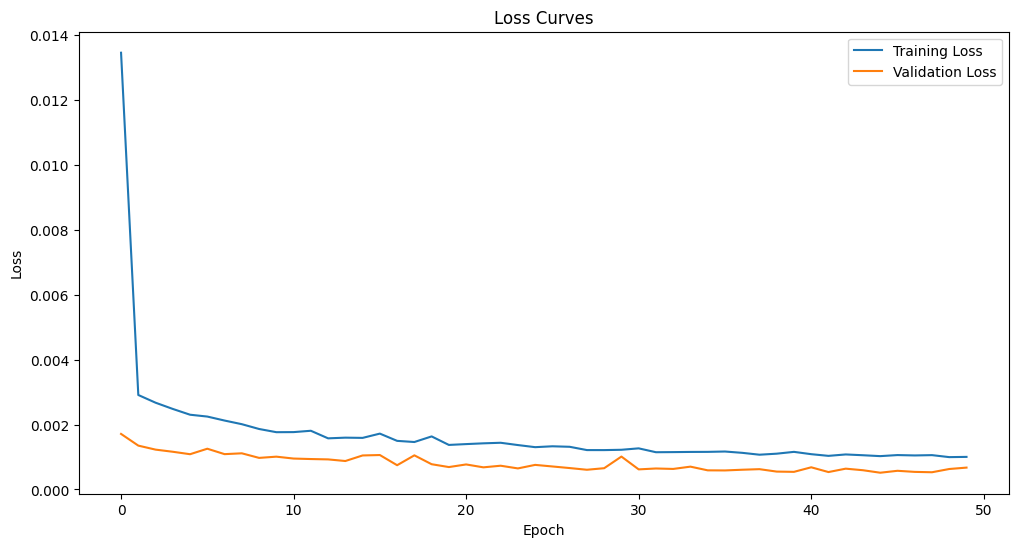

In [25]:
# Plot the loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
R² score for Adj_Close_Shell: 0.9838808300190786
R² score for VIX_Adj_Close: 0.9309375011148974


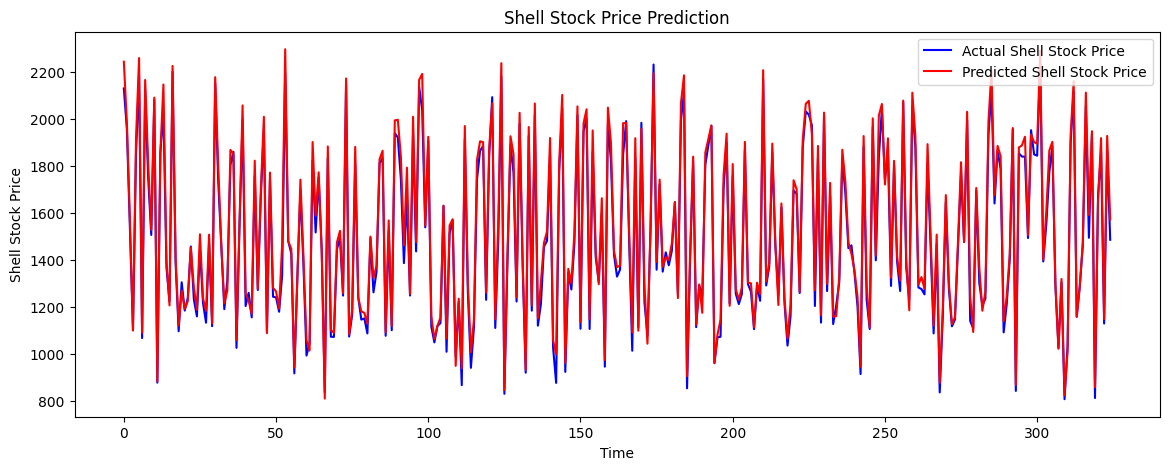

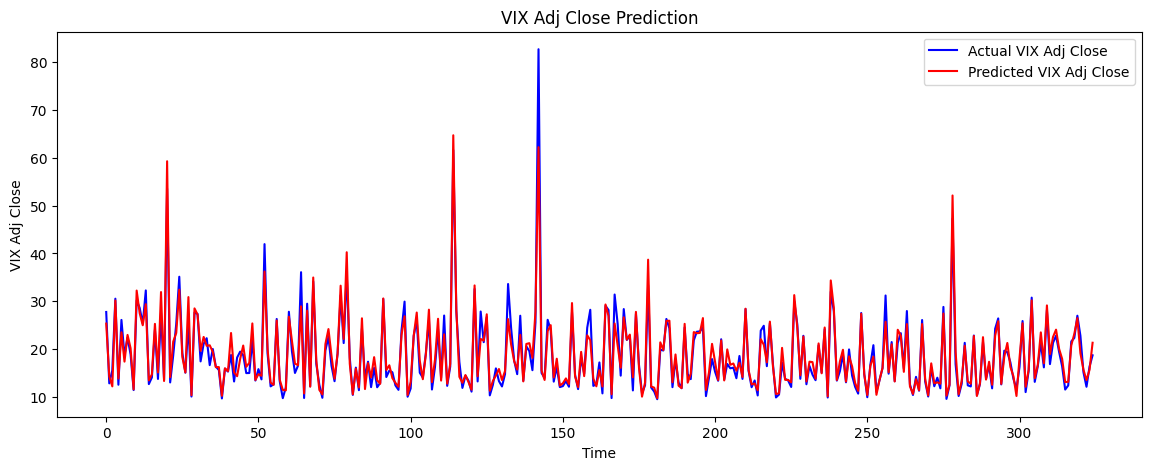

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
predictions = best_model.predict(X_test)

# Prepare the data for inverse transformation
predictions_extended = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_extended[:, :2] = predictions

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions_extended)[:, :2]

# Inverse transform the test data for plotting
y_test_extended = np.zeros((y_test.shape[0], scaled_data.shape[1]))
y_test_extended[:, :2] = y_test
y_test_scaled = scaler.inverse_transform(y_test_extended)[:, :2]

# Calculate R² score for each feature
r2_adj_close_shell = r2_score(y_test_scaled[:, 0], predictions[:, 0])
r2_vix_adj_close = r2_score(y_test_scaled[:, 1], predictions[:, 1])
print(f'R² score for Adj_Close_Shell: {r2_adj_close_shell}')
print(f'R² score for VIX_Adj_Close: {r2_vix_adj_close}')

# Plot the results for Adj_Close_Shell
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled[:, 0], color='blue', label='Actual Shell Stock Price')
plt.plot(predictions[:, 0], color='red', label='Predicted Shell Stock Price')
plt.title('Shell Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Shell Stock Price')
plt.legend()
plt.show()

# Plot the results for VIX_Adj_Close
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled[:, 1], color='blue', label='Actual VIX Adj Close')
plt.plot(predictions[:, 1], color='red', label='Predicted VIX Adj Close')
plt.title('VIX Adj Close Prediction')
plt.xlabel('Time')
plt.ylabel('VIX Adj Close')
plt.legend()
plt.show()